In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
def make_df(directory):
    csv = pd.read_csv(directory)
    df = pd.DataFrame(csv)
    return df

In [4]:
df_train = make_df('/kaggle/input/spaceship-titanic/train.csv')
df_test = make_df('/kaggle/input/spaceship-titanic/test.csv')

In [5]:
df_train.shape, df_test.shape

((8693, 14), (4277, 13))

In [6]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [7]:
df_train.drop(['PassengerId'], axis=1, inplace=True)
df_test.drop(['PassengerId'], axis=1, inplace=True)

In [48]:
train_features = df_train.drop(['Transported'], axis=1)
test_features = df_test
features = pd.concat([train_features, test_features]).reset_index(drop=True)

In [49]:
features.isna().sum()

HomePlanet      288
CryoSleep       310
Cabin           299
Destination     274
Age             270
VIP             296
RoomService     263
FoodCourt       289
ShoppingMall    306
Spa             284
VRDeck          268
Name            294
dtype: int64

In [50]:
features.loc[features['CryoSleep'] == True, ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = 0
features.loc[features['Age'] <= 12, ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = 0

In [51]:
features['Ameniti_paid'] = features[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)
features = features.drop(['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], axis=1)

In [52]:
features.loc[features['Ameniti_paid'] <= 0, ['Age']] = 0

In [53]:
features.isna().sum()

HomePlanet      288
CryoSleep       310
Cabin           299
Destination     274
Age             141
VIP             296
Name            294
Ameniti_paid      0
dtype: int64

<Axes: xlabel='HomePlanet', ylabel='count'>

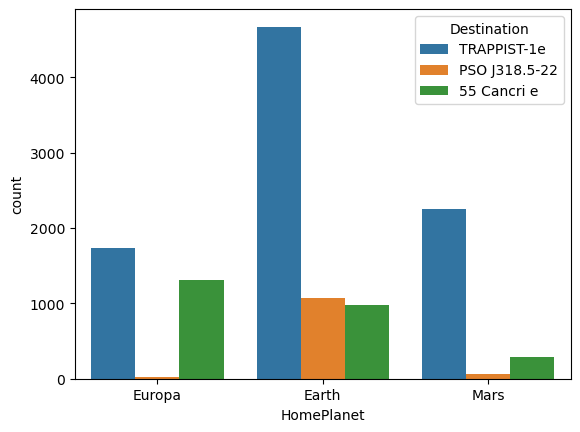

In [54]:
sns.countplot(data=features, x='HomePlanet', hue='Destination')


In [57]:
features['HomePlanet'] = features['HomePlanet'].fillna(features['HomePlanet'].mode()[0])
features['Destination'] = features['Destination'].fillna(features['Destination'].mode()[0])
features['CryoSleep'] = features['CryoSleep'].fillna(features['CryoSleep'].mode()[0])

In [61]:
features = features.drop(['Name', 'Cabin'], axis=1)

In [62]:
features.isna().sum()

HomePlanet        0
CryoSleep         0
Destination       0
Age             141
VIP             296
Ameniti_paid      0
dtype: int64

In [ ]:
features['']

# Freestyle

In [ ]:
df_train_Na = df_train.copy()
df_train_NaDrop = df_train_Na.dropna(axis=0)

In [ ]:
def factorize_obj(df):
    for i in df.select_dtypes('object'):
        df[i], _ = df[i].factorize()
    return df

In [ ]:
def mu_info(df):
    y = df['Transported']
    X = df.copy()
    X = factorize_obj(X)
    info = mutual_info_classif(X, y)
    
    for i, feature in enumerate(X.columns):
        print(f'Feature: {feature}, MI: {info[i]}')
    minfo = pd.DataFrame({'Feature': X.columns, 'MI_Score': info})
    
    return minfo

In [ ]:
def plot_sns(df):
    sns.set_theme()
    
    g = sns.relplot(
        data = df,
        x="Feature", y="MI_Score"
    )
    g.set_xticklabels(rotation=90)

In [ ]:
nadrop_minfo = mu_info(df_train_NaDrop)

In [ ]:
nadrop_minfo

In [ ]:
plot_sns(nadrop_minfo)

# Preprocessing

expand and consolidate data

In [ ]:
def separate_cabin(df):
    df[['Pri_cabin', 'Sub_cabin', 'Cabin_num']] = df['Cabin'].str.split('/', expand=True, n=3)
    return df

In [ ]:
df_train_filt = separate_cabin(df_train_NaDrop)

df_train_filt['Ameniti_paid'] = df_train_filt['RoomService'] + df_train_filt['FoodCourt'] + df_train_filt['ShoppingMall']+ df_train_filt['Spa']+ df_train_filt['VRDeck']

In [ ]:
df_train_filt.drop(['Cabin', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], axis=1, inplace=True)

In [ ]:
df_train_filt

In [ ]:
df_train_filt.dropna(axis=0, inplace=True)

In [ ]:
minfo = mu_info(df_train_filt)

In [ ]:
plot_sns(minfo)

# Boxplot high Mu_info

In [ ]:
def sns_boxplot(df, x, y):
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x=x, y=y)

    # Customize plot appearance
    plt.title(x + y)
    plt.xlabel(x)
    plt.ylabel(y)

    # Show the plot
    plt.show()

In [ ]:
def sns_countplot(df, x, y):
    plt.figure(figsize=(8,6))
    sns.countplot(data=df, x=x, hue=y)
    
    plt.title(x + y)
    plt.xlabel(x)
    plt.ylabel(y)

    # Show the plot
    plt.show()

In [ ]:
def sns_scatter(df, x, y, hue):
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df, x=x, y=y, hue=hue, style=hue)
    
    plt.title(x+y)
    plt.xlabel(x)
    plt.ylabel(y)
    
    plt.show()

In [ ]:
df_train_paid_transport = df_train_filt[['Ameniti_paid', 'Transported']]
sns_boxplot(df_train_paid_transport, 'Transported', 'Ameniti_paid')

In [ ]:
df_train_cryosleep_transported = df_train_filt[['CryoSleep', 'Transported']]
sns_countplot(df_train_cryosleep_transported, 'Transported', 'CryoSleep')

In [ ]:
df_train_age_amen = df_train_filt[['Age', 'Ameniti_paid', 'Transported']]
sns_scatter(df_train_age_amen, 'Age', 'Ameniti_paid', 'Transported')

# SNS Heatmap

In [ ]:
df_train_filt

df_train_NaDrop

In [ ]:
from sklearn.preprocessing import LabelEncoder

def heatmap(df):
    df = factorize_obj(df)
    
    encoder = LabelEncoder()
    cat = df.select_dtypes(include=['object']).columns
    
    for i in cat:
        df[i] = encoder.fit_transform(df[i])
        
    corr_mat = df.corr()
    
    sns.heatmap(corr_mat, cmap='RdBu', vmin=-1, vmax=1, linewidths=0.5)
    plt.show()

In [ ]:
heatmap(df_train_filt)

# Filling in NaN

In [ ]:
df_train

In [ ]:
df_train_fill = df_train.copy()

In [ ]:
df_train_fill.loc[df_train_fill['CryoSleep'] == True, ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = 0
df_train_fill.loc[df_train_fill['Age'] <= 12, ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = 0

In [ ]:
df_train_fill

In [ ]:
df_train.isna().sum()

In [ ]:
df_train_fill.isna().sum()

In [ ]:
column_sum = df_train_fill[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)

randval = np.random.randn(column_sum.eq(0).sum())

df_train_fill.loc[column_sum.eq(0), 'Age'] = randval

In [ ]:
df_train_fill.isna().sum()

In [ ]:
# 25~38 is the range where VIP is most frequent. Using df.loc set VIP to those meet conditions

for i in df_train_fill:
    if df[i]

# df_train_fill dropna

In [ ]:
df_train_fill.dropna(axis=0, inplace=True)
df_train_plot = mu_info(df_train_fill)
plot_sns(df_train_plot)

In [ ]:

sns_boxplot(df_train_fill, 'Transported', 'Age')

In [ ]:
heatmap(df_train_fill)

In [ ]:
sns.histplot(data=df_train_filt, x="Age", hue='VIP')

In [ ]:
df_train_filt.isna().sum()

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_train_fill.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

In [ ]:
# Create masks to separate categorical and continuous columns
categorical_mask = df_train_fill.select_dtypes(include=['object']).isnull()
continuous_mask = df_train_fill.select_dtypes(exclude=['object']).isnull()

# Create two separate heatmaps
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(categorical_mask, cmap='coolwarm', cbar=False, yticklabels=False)
plt.title('Missing Values Heatmap (Categorical)')

plt.subplot(1, 2, 2)
sns.heatmap(continuous_mask, cmap='coolwarm', cbar=False, yticklabels=False)
plt.title('Missing Values Heatmap (Continuous)')

plt.tight_layout()
plt.show()